# Data Cleaning and Exploration

## 1.) Problem Definition

> 
* Given historical maintenance and repair transactions of car owners, can we predict the car component that is most likely to fail?
* Can we predict how many days is the useful life of the component before failure (optional)



## 2.) Data

## 3.) Features

**Create Data Dictionary**

1. Year: ***model year** is a method of describing the version of a product which has been produced over multiple years. A vehicle's model year is not necessarily the same as the year it was manufactured.*
2. Make: *the **brand** of the vehicle*
3. Model: *refers to the name of a car product and sometimes a range of products*
4. Submodel: *refers to the specific body type style options of a vehicle *
   * *For example, the 2018 Honda Civic Sedan have six different trim-level options:
     * LX*
     * ET
     * EX-T
     * EX-L
     * Si
     * Touring
5. Engine: *a number or code refering to the identification marked on the engine of a vehicle.*
6. VIN (Vehicle Identification Number): *is the identifying code for a specific automobile. The VIN serves as the car's fingerprint, as no two vehicles in operation have the same VIN.* 
   * We can visit the Vin Decoders [[1](https://vpic.nhtsa.dot.gov/decoder/)], [[2](https://driving-tests.org/vin-decoder/)]
7. Line Type: general category for the services.
   * Material
   * Labor
   * Sublet (*What is a sublet?*)
8. Service Category
   * Oil, Lube & Preventive Maintenance Service
   * Sublet & Towing
   * Engine
   * Electrical (Belts, Lighting, Starting & Charging Systems)
   * Tires & Wheels
   * Driveability (Fuel, Ignition & Emission Systems)
   * Steering & Suspension 
   * Brakes
   * Cooling System
   * Transmission & Clutch
   * Car Detailing Services
   * Accessories (Gauges, Power Accessories, Vision & Air Bag)
   * Counter / Cash Sale
   * HVAC (Heating, Ventilation & Air Conditioning)
   * Drive Train (Final Drive, Transaxle, Differential & Transfer Case
   * Batteries
   * Exhaust
   * Shop Internal Warranty
9.  Code: (*Is this a unique identifier code in their system?*)
10. Service Package: *Type of service package offered. How was this data gathered? Manually inputted? Or system defined?* (*There are 4251 unique values that they want to predict. How should we proceed?*)
11. Line Code
    * E.ROD
    * BAN
    * MIT 
    * FIC
    * FLE
    * BEN
    * SAI
    * 555
    * AISIN
12. Part Number: *Refers to the specific part serviced*(*There are 5396 unique values for Part Number. How should we proceed?*)
13. Description: **For Clarification** : *Does this column indicate the name of material/product used?*
14. Manufacturer: *Refers to the manufacturer of the product used during the service.*
15. Definition: **For Clarification:** *We have 24780 null values here, can we use the description instead? But this is also a good column since it generalizes the type of product used.*
16. Price
17. Quantity
18. Total
19. Discount
20. Net Total
21. Cost
22. Other Charge Code
23. ContactID
24. ServiceItemID
25. InvoiceID
26. DefinitionID




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',50)

In [2]:
df0 = pd.read_excel('DATA SET 0222020.xlsx',sheet_name = 0)
df0.head()

,Year,Make,Model,Submodel,Engine,VIN,Line Type,Service Category,Code,Service Package,Line Code,Part Number,Description,Manufacturer,Definition,Price,Quantity,Total,Discount,Net Total,Cost,Other Charge Code,ContactID,ServiceItemID,InvoiceID,DefinitionID
0,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,RP139X51,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,REPSOL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,962.28,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,12138.0
1,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,HON-15400-RAF-TO1,OIL FILTER HONDA,HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,430.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,5340.0
2,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,LUBRI-ENG-FLUSH-500,ENGINE FLUSHING,LUBRIGOLD,NaN,142.86,1.0,142.86,0.0,142.86,88.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
3,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,JOH-2413-14oz,BRAKE CLEANER 14oz,JOHNSENS,NaN,227.68,1.0,227.68,0.0,227.68,145.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
4,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,NaN,Labor,NaN,NaN,446.43,3.0,1339.29,0.0,1339.29,0.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN


In [3]:
df1 = pd.read_excel('DATA SET 0222020.xlsx',sheet_name = 1)
df1.head()

,Year,Make,Model,Submodel,Engine,VIN,Line Type,Service Category,Code,Service Package,Line Code,Part Number,Description,Manufacturer,Definition,Price,Quantity,Total,Discount,Net Total,Cost,Other Charge Code,ContactID,ServiceItemID,InvoiceID,DefinitionID
0,2005.0,Toyota,Camry,Base,L4 2.4L 2362CC,ACV30-9001315,Labor,Steering & Suspension,WAP,Complete Computerized Wheel Alignment (SEDAN),NaN,NaN,Labor,NaN,NaN,937.50,1.68,937.50,468.75,468.75,161.70,V,65e950a8-769d-46a6-a630-8376817b5d37,80080510-b55f-4931-b793-d128c43d6742,418d799f-2252-458b-977c-a0d07151d7af,NaN
1,2005.0,Toyota,Camry,Base,L4 2.4L 2362CC,ACV30-9001315,Labor,Steering & Suspension,NaN,Diagnose Suspension Concern,NaN,NaN,Labor,NaN,NaN,500.00,0.00,0.00,0.00,0.00,0.00,V,65e950a8-769d-46a6-a630-8376817b5d37,80080510-b55f-4931-b793-d128c43d6742,418d799f-2252-458b-977c-a0d07151d7af,NaN
2,2005.0,Toyota,Camry,Base,L4 2.4L 2362CC,ACV30-9001315,Labor,Steering & Suspension,NaN,Steering & Suspension Pinpoint Inspection,NaN,NaN,Labor,NaN,NaN,550.00,1.00,550.00,550.00,0.00,96.25,V,65e950a8-769d-46a6-a630-8376817b5d37,80080510-b55f-4931-b793-d128c43d6742,418d799f-2252-458b-977c-a0d07151d7af,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Material,Counter / Cash Sale,NaN,Counter / Cash Sale,NaN,WHI-BFD3-150ml,BRAKE FLUIDS 150ml,WHIZ,Brake Fluid,71.42,1.00,71.42,0.00,71.42,35.00,V,56b95ab8-1dd3-496b-a25a-459809dc6071,00000000-0000-0000-0000-000000000000,9a3515e8-aa3e-4e23-8670-4637ea08e884,11389.0
4,2017.0,MITSUBISHI,MIRAGE G4,NaN,NaN,PAEA13TJHHA002002,Labor,Car Detailing Services,CWD,"Car Wash, Vacuum and Tire Dressing - SEDAN",NaN,NaN,Labor,NaN,NaN,116.07,1.00,116.07,0.00,116.07,76.17,V,dba82a13-52d0-4e73-b5f6-7e4afc408b38,984f97d4-8801-4286-a510-19e762b6e00b,1b6fe9d9-457a-4768-ac6d-74d40f289cc6,NaN


In [4]:
df2 = pd.read_excel('DATA SET 0222020.xlsx',sheet_name = 2)
df2.head()

,Year,Make,Model,Submodel,Engine,VIN,Line Type,Service Category,Code,Service Package,Line Code,Part Number,Description,Manufacturer,Definition,Price,Quantity,Total,Discount,Net Total,Cost,Other Charge Code,ContactID,ServiceItemID,InvoiceID,DefinitionID
0,2014.0,CHEVROLET,TRAIL BLAZER,NaN,BG1G140071217,MMM156MK0EH618098,Labor,"Oil, Lube & Preventive Maintenance Service",MAJOR-PMS,MAJOR PMS - SMALL SUV/AUV,NaN,NaN,Labor,NaN,NaN,446.43,6.0,2678.58,133.93,2544.65,337.5,V,c0db4508-bbde-44ce-8fea-4019959229cd,d976ef60-818e-4498-a7a1-0324192a7216,0ef94fb2-5bf8-4e0a-9c74-b985aae83512,NaN
1,2014.0,CHEVROLET,TRAIL BLAZER,NaN,BG1G140071217,MMM156MK0EH618098,Material,"Oil, Lube & Preventive Maintenance Service",MAJOR-PMS,MAJOR PMS - SMALL SUV/AUV,NaN,JOH-2413-14oz,Brake Cleaner,JOHNSEN,Brake Cleaner,232.14,1.0,232.14,0.00,232.14,150.0,V,c0db4508-bbde-44ce-8fea-4019959229cd,d976ef60-818e-4498-a7a1-0324192a7216,0ef94fb2-5bf8-4e0a-9c74-b985aae83512,16751.0
2,0.0,TOYOTA,VIOS,NaN,1NZX236831,MR053HY4204117306,Labor,"Oil, Lube & Preventive Maintenance Service",COP-FULLY,Change Oil Package - FULLY Synthetic (4L),NaN,NaN,Labor,NaN,NaN,446.43,1.0,446.43,0.00,446.43,0.0,V,b1517ba0-3a71-47f6-b19a-392d190b3c62,edd34363-00bf-4645-9d44-fcc6b889bec7,31d8c25a-4f19-479a-8288-8194beff0579,NaN
3,0.0,TOYOTA,VIOS,NaN,1NZX236831,MR053HY4204117306,Material,"Oil, Lube & Preventive Maintenance Service",COP-FULLY,Change Oil Package - FULLY Synthetic (4L),NaN,LUBRI-ENG-FLUSH-500,ENGINE FLUSHING,LUBRIGOLD,NaN,133.91,1.0,133.91,0.00,133.91,0.0,V,b1517ba0-3a71-47f6-b19a-392d190b3c62,edd34363-00bf-4645-9d44-fcc6b889bec7,31d8c25a-4f19-479a-8288-8194beff0579,NaN
4,0.0,TOYOTA,VIOS,NaN,1NZX236831,MR053HY4204117306,Material,"Oil, Lube & Preventive Maintenance Service",COP-FULLY,Change Oil Package - FULLY Synthetic (4L),NaN,RP141J51,REPSOL ELITE EVOLUTION 5W40 1L,REPSOL,Engine Oil,607.15,4.0,2428.60,1205.36,1223.24,526.5,V,b1517ba0-3a71-47f6-b19a-392d190b3c62,edd34363-00bf-4645-9d44-fcc6b889bec7,31d8c25a-4f19-479a-8288-8194beff0579,12138.0


In [5]:
df0.columns == df1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
print(df0.shape[0] + df1.shape[0] + df2.shape[0])

41514


In [8]:
df1.shape[1]

26

In [9]:
df2.shape[1]

26

In [10]:
df = pd.concat([df0,df1,df2])

In [22]:
df.to_csv('Autoserved Dataset.csv')

In [11]:
df.shape

(41514, 26)

In [12]:
df.head()

,Year,Make,Model,Submodel,Engine,VIN,Line Type,Service Category,Code,Service Package,Line Code,Part Number,Description,Manufacturer,Definition,Price,Quantity,Total,Discount,Net Total,Cost,Other Charge Code,ContactID,ServiceItemID,InvoiceID,DefinitionID
0,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,RP139X51,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,REPSOL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,962.28,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,12138.0
1,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,HON-15400-RAF-TO1,OIL FILTER HONDA,HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,430.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,5340.0
2,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,LUBRI-ENG-FLUSH-500,ENGINE FLUSHING,LUBRIGOLD,NaN,142.86,1.0,142.86,0.0,142.86,88.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
3,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,JOH-2413-14oz,BRAKE CLEANER 14oz,JOHNSENS,NaN,227.68,1.0,227.68,0.0,227.68,145.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
4,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,NaN,Labor,NaN,NaN,446.43,3.0,1339.29,0.0,1339.29,0.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41514 entries, 0 to 4622
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               39770 non-null  float64
 1   Make               39703 non-null  object 
 2   Model              39635 non-null  object 
 3   Submodel           4274 non-null   object 
 4   Engine             24146 non-null  object 
 5   VIN                35360 non-null  object 
 6   Line Type          41514 non-null  object 
 7   Service Category   41514 non-null  object 
 8   Code               25252 non-null  object 
 9   Service Package    41514 non-null  object 
 10  Line Code          23 non-null     object 
 11  Part Number        30110 non-null  object 
 12  Description        41514 non-null  object 
 13  Manufacturer       28459 non-null  object 
 14  Definition         16734 non-null  object 
 15  Price              41514 non-null  float64
 16  Quantity           4151

In [14]:
df.isna().sum()

Year                  1744
Make                  1811
Model                 1879
Submodel             37240
Engine               17368
VIN                   6154
Line Type                0
Service Category         0
Code                 16262
Service Package          0
Line Code            41491
Part Number          11404
Description              0
Manufacturer         13055
Definition           24780
Price                    0
Quantity                 0
Total                    0
Discount                 0
Net Total                0
Cost                     0
Other Charge Code        9
ContactID                0
ServiceItemID            0
InvoiceID                0
DefinitionID         24780
dtype: int64

## Column Analysis

In [15]:
# Checking the Submodel Column for not null values

df[df['Year'].notnull()]

,Year,Make,Model,Submodel,Engine,VIN,Line Type,Service Category,Code,Service Package,Line Code,Part Number,Description,Manufacturer,Definition,Price,Quantity,Total,Discount,Net Total,Cost,Other Charge Code,ContactID,ServiceItemID,InvoiceID,DefinitionID
0,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,RP139X51,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,REPSOL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,962.28,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,12138.0
1,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,HON-15400-RAF-TO1,OIL FILTER HONDA,HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,430.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,5340.0
2,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,LUBRI-ENG-FLUSH-500,ENGINE FLUSHING,LUBRIGOLD,NaN,142.86,1.0,142.86,0.0,142.86,88.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
3,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,JOH-2413-14oz,BRAKE CLEANER 14oz,JOHNSENS,NaN,227.68,1.0,227.68,0.0,227.68,145.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
4,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,NaN,Labor,NaN,NaN,446.43,3.0,1339.29,0.0,1339.29,0.00,V,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,2020.0,TOYOTA,VIOS 1.5,NaN,2NR-FE,PA1B23F31L6007275,Labor,"Oil, Lube & Preventive Maintenance Service",MINOR-PMS,MINOR PMS - COMPACT / SMALL SEDAN ( SEMI SYNTH...,NaN,NaN,Labor,NaN,NaN,446.43,3.0,1339.29,0.0,1339.29,185.62,V,4c624834-9705-4ec0-b03a-2d8c9aed4eba,a40028c9-a0e8-48fb-b70d-8f289026105e,bc77419b-3963-49a3-98bc-8b3f4e44c4e3,NaN
4619,2020.0,TOYOTA,VIOS 1.5,NaN,2NR-FE,PA1B23F31L6007275,Material,"Oil, Lube & Preventive Maintenance Service",MINOR-PMS,MINOR PMS - COMPACT / SMALL SEDAN ( SEMI SYNTH...,NaN,JOH-2413-14oz,BRAKE CLEANER,JOHNSENS,NaN,232.14,1.0,232.14,0.0,232.14,166.67,V,4c624834-9705-4ec0-b03a-2d8c9aed4eba,a40028c9-a0e8-48fb-b70d-8f289026105e,bc77419b-3963-49a3-98bc-8b3f4e44c4e3,NaN
4620,2020.0,TOYOTA,VIOS 1.5,NaN,2NR-FE,PA1B23F31L6007275,Material,"Oil, Lube & Preventive Maintenance Service",MINOR-PMS,MINOR PMS - COMPACT / SMALL SEDAN ( SEMI SYNTH...,NaN,RP139X51,REPSOL ELITE INJECTION 10W40 1L - GAS/ DIESEL,REPSOL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,962.28,V,4c624834-9705-4ec0-b03a-2d8c9aed4eba,a40028c9-a0e8-48fb-b70d-8f289026105e,bc77419b-3963-49a3-98bc-8b3f4e44c4e3,12138.0
4621,2020.0,TOYOTA,VIOS 1.5,NaN,2NR-FE,PA1B23F31L6007275,Material,"Oil, Lube & Preventive Maintenance Service",MINOR-PMS,MINOR PMS - COMPACT / SMALL SEDAN ( SEMI SYNTH...,NaN,C-110,OIL FILTER,VIC,NaN,428.57,1.0,428.57,0.0,428.57,180.00,V,4c624834-9705-4ec0-b03a-2d8c9aed4eba,a40028c9-a0e8-48fb-b70d-8f289026105e,bc77419b-3963-49a3-98bc-8b3f4e44c4e3,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '2014.0'),
  Text(1, 0, '2015.0'),
  Text(2, 0, '2016.0'),
  Text(3, 0, '2017.0'),
  Text(4, 0, '2013.0'),
  Text(5, 0, '0.0'),
  Text(6, 0, '2011.0'),
  Text(7, 0, '2010.0'),
  Text(8, 0, '2012.0'),
  Text(9, 0, '2008.0'),
  Text(10, 0, '2018.0'),
  Text(11, 0, '2009.0'),
  Text(12, 0, '2007.0'),
  Text(13, 0, '2005.0'),
  Text(14, 0, '2006.0'),
  Text(15, 0, '2004.0'),
  Text(16, 0, '2019.0'),
  Text(17, 0, '2002.0'),
  Text(18, 0, '2003.0'),
  Text(19, 0, '2000.0'),
  Text(20, 0, '2020.0'),
  Text(21, 0, '1997.0'),
  Text(22, 0, '2001.0'),
  Text(23, 0, '1998.0'),
  Text(24, 0, '1996.0'),
  Text(25, 0, '1999.0'),
  Text(26, 0, '1995.0'),
  Text(27, 0, '1994.0'),
  Text(28, 0, '1969.0'),
  Text(29, 0, '83151.0'),
  Text(30, 0, '1991.0'),
  Text(31, 0, '1992.0'),
  Text(32, 0, 

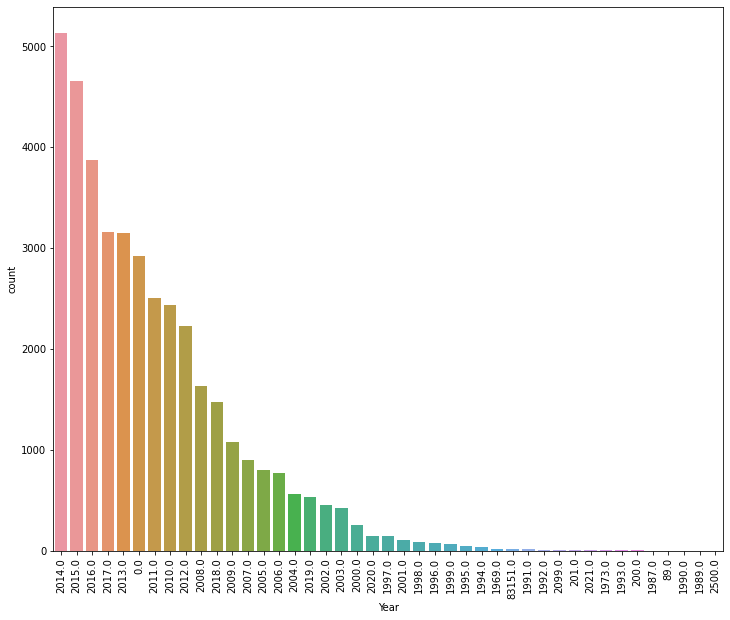

In [16]:
# What Submodel are very common?
plt.figure(figsize = (12,10))
sns.countplot(data = df, x = 'Year', order =df['Year'].value_counts().iloc[::].index)
plt.xticks(rotation = 90)

> We have a problem with cars with 0 years

In [17]:
# Dataframe with Years 0, 83151,0, 201,0, 89.0, 2500.0
df.loc[df['Year'].isin([0.0,83151.0,201.0,89.0,2500.0])]['Make'].unique()

array(['Ford', 'Vios', 'MITSUBISHI', 'Hyundai', 'Suzuki', 'Mitsubishi',
       'Toyota', 'Mazda', 'HONDA', 'H100', 'Honda', 'Accent', 'TOYOTA',
       'Starex', 'I10', 'Nissan', 'Ecosport', nan, 'SUBARU', 'Exalta',
       'Captiva', 'Mux', 'Picanto', 'Adventure', 'Sorento', 'Montero',
       'Fortuner', 'CHEVROLET', 'Avanza', 'Getz', 'Mirage', 'FORD', 'BMW',
       'ISUZU', 'Trailblazer', 'Carens', 'Mercedes', 'Innova', 'Isuzu',
       'Aveo', 'Chevrolet', 'City', 'Civic', 'Cx-5', 'Forester', 'Rav4',
       'Crosswind', 'SUZUKI', 'Kia', 'Xv', 'Asx', 'Altis', 'Expe',
       'MAZDA', 'HYUNDAI', 'MITUSBISHI', 'MITSUBISHI (GAS)', 'NISSAN',
       '2018', 'Mitsubushi', 'Mazda 2', 'TOYOTA WIGO M/T GAS', 'KIA',
       'VOLVO', 'TOYOYA', 'CHEVERLET', 'SAFARI', 'ISUZU SPORTIVO',
       'ZUSUKI', 'HUNDAI', 'FOTON', 'toyota'], dtype=object)

In [18]:
df.loc[df['Year'] == 0,:]['Make'].unique()

array(['Ford', 'Vios', 'MITSUBISHI', 'Hyundai', 'Suzuki', 'Mitsubishi',
       'Toyota', 'Mazda', 'HONDA', 'H100', 'Honda', 'Accent', 'TOYOTA',
       'Starex', 'I10', 'Nissan', 'Ecosport', nan, 'SUBARU', 'Exalta',
       'Captiva', 'Mux', 'Picanto', 'Adventure', 'Sorento', 'Montero',
       'Fortuner', 'CHEVROLET', 'Avanza', 'Getz', 'Mirage', 'FORD', 'BMW',
       'ISUZU', 'Trailblazer', 'Carens', 'Mercedes', 'Innova', 'Isuzu',
       'Aveo', 'Chevrolet', 'City', 'Civic', 'Cx-5', 'Forester', 'Rav4',
       'Crosswind', 'SUZUKI', 'Kia', 'Xv', 'Asx', 'Altis', 'Expe',
       'MAZDA', 'HYUNDAI', 'MITUSBISHI', 'MITSUBISHI (GAS)', 'NISSAN',
       'Mitsubushi', 'Mazda 2', 'TOYOTA WIGO M/T GAS', 'KIA', 'VOLVO',
       'TOYOYA', 'CHEVERLET', 'SAFARI', 'ISUZU SPORTIVO', 'ZUSUKI',
       'HUNDAI', 'FOTON', 'toyota'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Toyota'),
  Text(1, 0, 'TOYOTA'),
  Text(2, 0, 'MITSUBISHI'),
  Text(3, 0, 'Mitsubishi'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'FORD'),
  Text(6, 0, 'HONDA'),
  Text(7, 0, 'Hyundai'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'HYUNDAI'),
  Text(10, 0, 'ISUZU'),
  Text(11, 0, 'Chevrolet'),
  Text(12, 0, 'NISSAN'),
  Text(13, 0, 'CHEVROLET'),
  Text(14, 0, 'Mazda'),
  Text(15, 0, 'Suzuki'),
  Text(16, 0, 'Nissan'),
  Text(17, 0, 'MAZDA'),
  Text(18, 0, 'KIA'),
  Text(19, 0, 'Isuzu'),
  Text(20, 0, 'Kia'),
  Text(21, 0, 'SUZUKI'),
  Text(22, 0, 'BMW'),
  Text(23, 0, 'SUBARU'),
  Text(24, 0, 'Subaru'),
  Text(25, 0, 'Vios'),
  Text(26, 0, 'Montero'),
  Text(27, 0, 'H100'),
  Text(28, 0, 'Civic'),
  Text(29, 0, 'Tucson')])

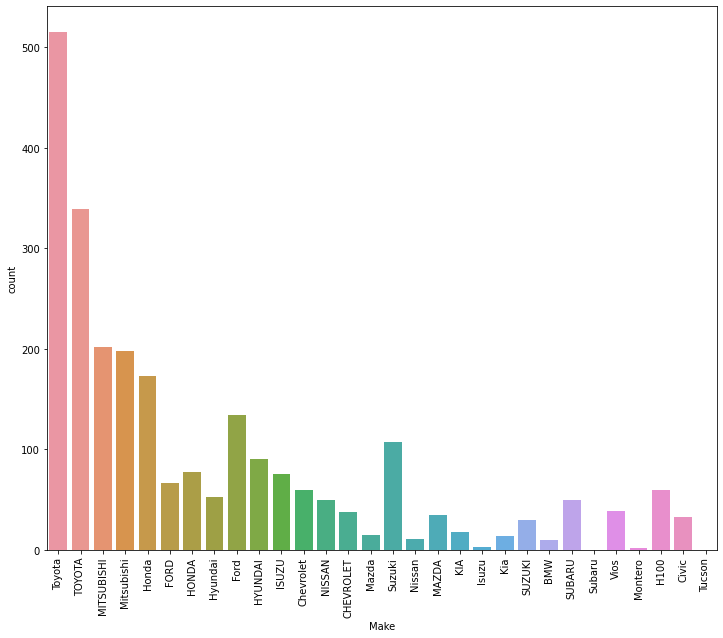

In [19]:
plt.figure(figsize = (12,10))
sns.countplot(data = df[df['Year'] == 0], x = 'Make', order =df['Make'].value_counts().iloc[:30].index)
df.loc[df['Year'] == 0, :]
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Counter / Cash Sale'),
  Text(1, 0, 'MINOR Preventive Maintenance Service '),
  Text(2, 0, 'CVI Complete Vehicle Inspection'),
  Text(3, 0, 'MINOR PMS'),
  Text(4, 0, 'MINOR Preventive Maintenance Service (LARGE SUV/PICK-UP/VAN) 10KM, 20KM, 30KM, 50KM, 60,KM, 70KM, 90KM, 100KM, 110KM, 130KM 140KM, 150KM'),
  Text(5, 0, 'MINOR Preventive Maintenance Service (MEDIUM SEDAN) 10KM, 20KM, 30KM, 50KM, 60,KM, 70KM, 90KM, 100KM, 110KM, 130KM 140KM, 150KM'),
  Text(6, 0, 'MAJOR PMS'),
  Text(7, 0, 'VPX - Change Oil Package - (GAS)'),
  Text(8, 0, 'MINOR Preventive Maintenance Service (COMPACT/SMALL SEDAN) 10KM, 20KM, 30KM, 50KM, 60,KM, 70KM, 90KM, 100KM, 110KM, 130KM 140KM, 150KM'),
  Text(9, 0, 'MINOR Preventive Maintenance Service (SMALL SUV/AUV) 10KM, 20KM,

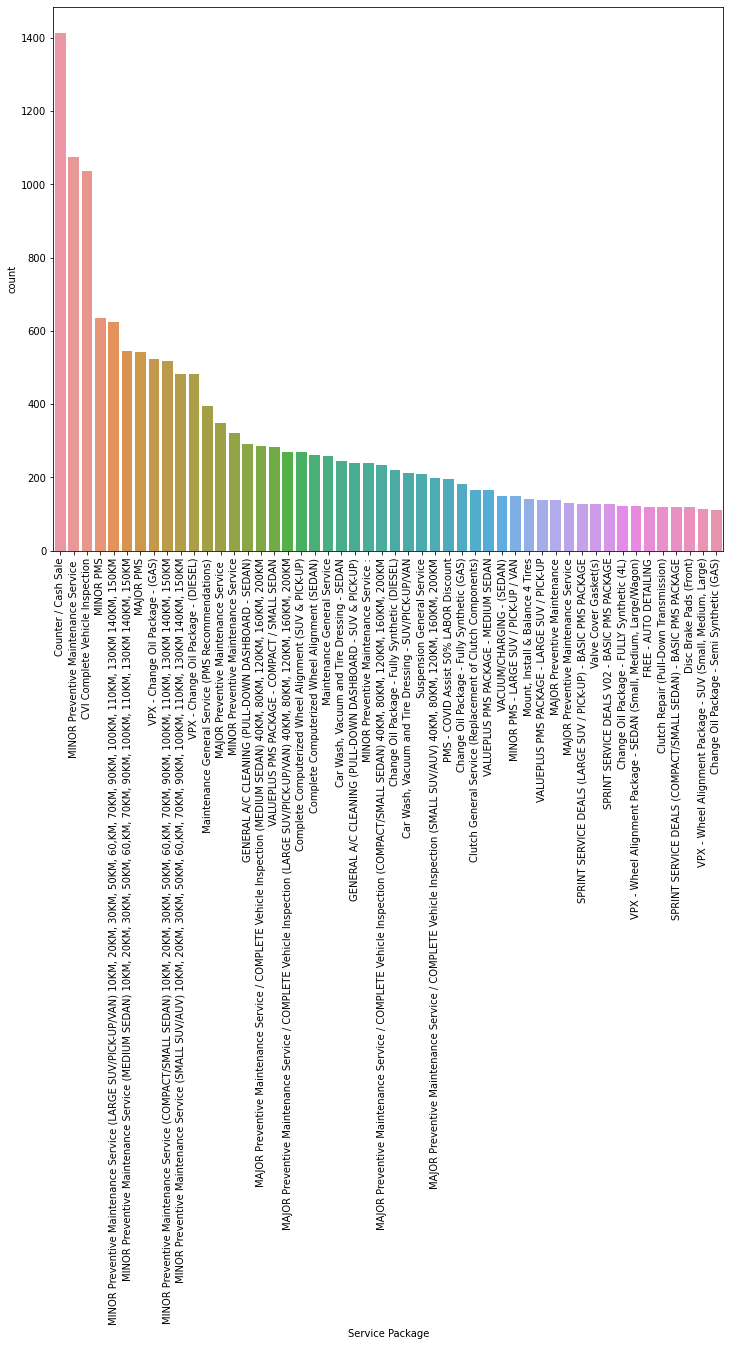

In [20]:
# What Submodel are very common?
plt.figure(figsize = (12,10))
sns.countplot(data = df, x = 'Service Package', order =df['Service Package'].value_counts().iloc[:50].index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Oil, Lube & Preventive Maintenance Service'),
  Text(1, 0, 'Steering & Suspension'),
  Text(2, 0, 'Brakes'),
  Text(3, 0, 'HVAC (Heating, Ventilation & Air Conditioning)'),
  Text(4, 0, 'Counter / Cash Sale'),
  Text(5, 0, 'Engine'),
  Text(6, 0, 'Transmission & Clutch'),
  Text(7, 0, 'Car Detailing Services'),
  Text(8, 0, 'Driveability (Fuel, Ignition & Emission Systems)'),
  Text(9, 0, 'Tires & Wheels'),
  Text(10, 0, 'Cooling System'),
  Text(11, 0, 'Electrical (Belts, Lighting, Starting & Charging Systems)'),
  Text(12, 0, 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),
  Text(13, 0, 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),
  Text(14, 0, 'Batteries'),
  Text(15, 0, 'Sublet & Towing'),
  Text(16, 0, 'Exhaust'),
  Text(17, 0, 'Shop Internal Warranty')])

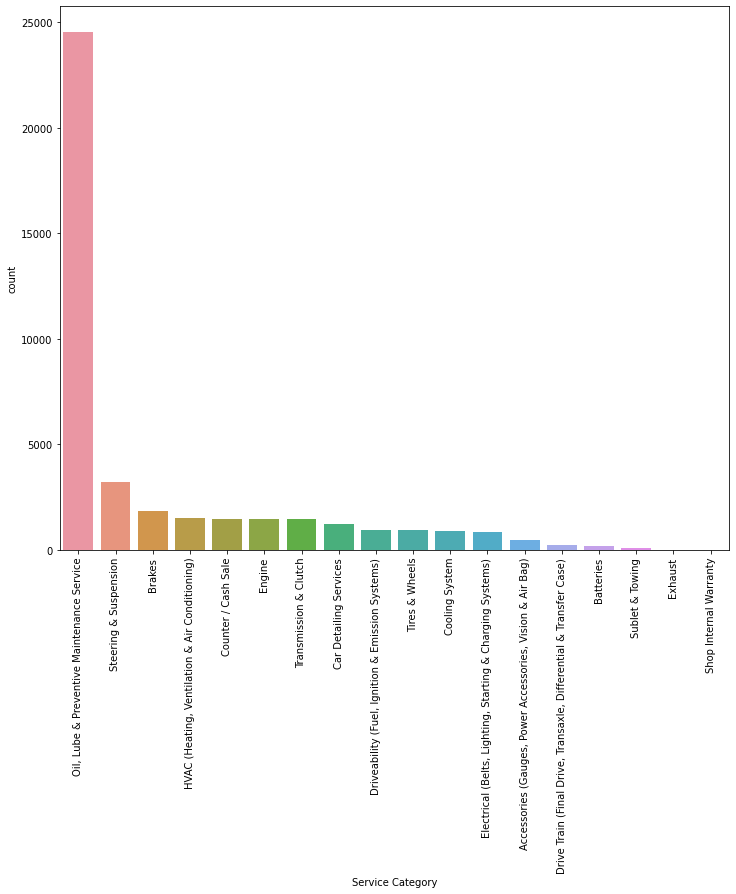

In [21]:
# What Submodel are very common?
plt.figure(figsize = (12,10))
sns.countplot(data = df, x = 'Service Category', order =df['Service Category'].value_counts().iloc[:50].index)
plt.xticks(rotation = 90)